#  4.9  -  Intro to Data Visualization with Python - Task pt1

In [1]:
#  Import libraries

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Paths to/from project folder

path_orig = r'C:\Users\kacor\CareerFoundry-Python\PROJECT - Instacart Basket Analysis\02 Data\Original Data'
path_prep = r'C:\Users\kacor\CareerFoundry-Python\PROJECT - Instacart Basket Analysis\02 Data\Prepared Data'
path_vis = r'C:\Users\kacor\CareerFoundry-Python\PROJECT - Instacart Basket Analysis\04 Analysis\Visualizations'

In [3]:
#  Import new original customers dataset

df_customers = pd.read_csv(os.path.join(path_orig, 'customers.csv'))

####  4. Wrangle the data so that it follows consistent logic; for example, rename columns with illogical names and drop columns that don’t add anything to your analysis.

##  STEP 1, ACCESS THE df_customers DATA

In [4]:
df_customers.shape

(206209, 10)

In [5]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       206209 non-null  int64 
 1   First Name    194950 non-null  object
 2   Surnam        206209 non-null  object
 3   Gender        206209 non-null  object
 4   STATE         206209 non-null  object
 5   Age           206209 non-null  int64 
 6   date_joined   206209 non-null  object
 7   n_dependants  206209 non-null  int64 
 8   fam_status    206209 non-null  object
 9   income        206209 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 15.7+ MB


In [6]:
df_customers.isnull().sum()

user_id             0
First Name      11259
Surnam              0
Gender              0
STATE               0
Age                 0
date_joined         0
n_dependants        0
fam_status          0
income              0
dtype: int64

In [7]:
df_dups = df_customers[df_customers.duplicated()]
df_dups

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income


OBSERVATION
-  Change date joined data type to datetime
-  Change income data type to float
-  There are missing values in the first name column. This column will be deleted later for data security reasons
-  There are no duplicates

In [8]:
df_customers.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


OBSERVATION
-  Many of the column names should be standardized and/or renamed to be more clear

In [9]:
df_customers.tail()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
206204,168073,Lisa,Case,Female,North Carolina,44,4/1/2020,1,married,148828
206205,49635,Jeremy,Robbins,Male,Hawaii,62,4/1/2020,3,married,168639
206206,135902,Doris,Richmond,Female,Missouri,66,4/1/2020,2,married,53374
206207,81095,Rose,Rollins,Female,California,27,4/1/2020,1,married,99799
206208,80148,Cynthia,Noble,Female,New York,55,4/1/2020,1,married,57095


In [10]:
df_customers.sample(25)

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
39935,39924,NaN,Williamson,Female,South Dakota,22,8/19/2017,2,married,43470
18320,117890,Amanda,Burnett,Female,North Dakota,67,4/16/2017,1,married,34932
114696,109093,Julia,Knapp,Female,Arkansas,67,10/23/2018,2,married,93238
184078,26058,Stephanie,Hill,Female,Washington,39,11/26/2019,0,single,57919
163685,11830,Sarah,Buchanan,Female,West Virginia,55,8/2/2019,3,married,94358
55898,114193,Jose,Morgan,Male,Arkansas,19,11/18/2017,1,living with parents and siblings,71857
127689,25823,Ryan,Villalobos,Male,Kansas,66,1/6/2019,3,married,136906
24913,181217,Peter,Mcguire,Male,Illinois,34,5/24/2017,2,married,54647
21290,96488,Lillian,Thomas,Female,Virginia,73,5/3/2017,2,married,151047
4423,98033,Jonathan,Hawkins,Male,Georgia,31,1/26/2017,2,married,68207


OBSERVATION
-  There are some unexpected statuses in the family status column. Unsure if I will use these

In [11]:
df_customers.describe()

,user_id,Age,n_dependants,income
count,206209.000000,206209.000000,206209.000000,206209.000000
mean,103105.000000,49.501646,1.499823,94632.852548
std,59527.555167,18.480962,1.118433,42473.786988
min,1.000000,18.000000,0.000000,25903.000000
25%,51553.000000,33.000000,0.000000,59874.000000
50%,103105.000000,49.000000,1.000000,93547.000000
75%,154657.000000,66.000000,3.000000,124244.000000
max,206209.000000,81.000000,3.000000,593901.000000


OBSERVATION
-  There do not appear to be any outliers at the low or high range in any of these columns
-  The max of 3 in n_dependants seems a bit unusual
-  The mean & median of income is higher than I expected, but this is not meant to imply that the data is incorrect

In [12]:
df_customers['Age'].value_counts()

19    3329
55    3317
51    3317
56    3306
32    3305
      ... 
65    3145
25    3127
66    3114
50    3102
36    3101
Name: Age, Length: 64, dtype: int64

<AxesSubplot:>

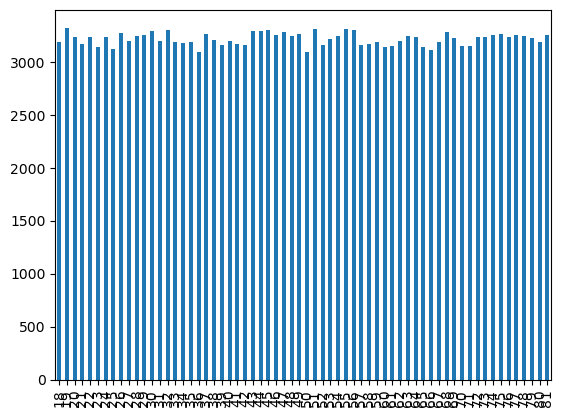

In [13]:
df_customers['Age'].value_counts().sort_index().plot.bar()

OBSERVATION
-  While this bar chart is very difficult to interpret, one thing it does illustrate is that the number of customers across all ages is fairly uniform between approximately 3100 and 3300.

In [14]:
df_customers['n_dependants'].value_counts()

0    51602
3    51594
1    51531
2    51482
Name: n_dependants, dtype: int64

OBSERVATION
-  The number of dependants is nearly evenly split between 0, 1 2, & 3 children

<AxesSubplot:ylabel='Frequency'>

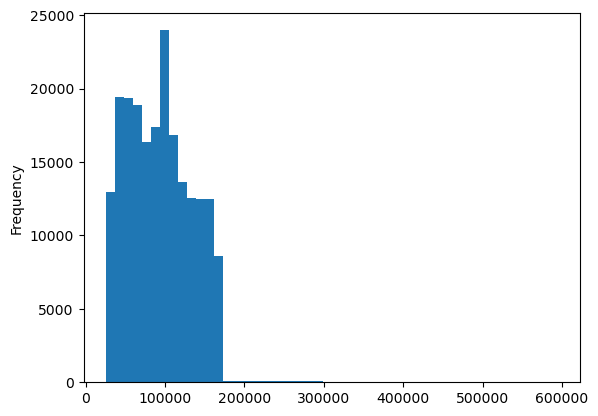

In [15]:
df_customers['income'].plot.hist(bins = 50)

In [16]:
df_customers['income'].sort_values().tail(50)

204513    518856
129594    521640
131449    521807
124589    523088
129576    524193
180894    525892
85183     526894
152849    528102
145552    528184
46867     529539
100899    531126
68108     532201
170173    536156
91486     539810
34899     540239
98377     540828
109407    543925
127232    544217
51576     544248
121169    544515
164664    544896
114821    545128
30603     549286
199982    550917
139133    551672
181442    551849
87566     552776
28772     553569
147057    556641
55980     558033
21704     559700
51985     562610
181171    567729
135221    569253
122243    569810
200774    571932
78104     573617
70431     573849
185582    574425
12044     576876
2018      577728
66262     578251
27182     578551
98469     579169
200450    579397
167037    584097
111950    590790
81583     591089
202655    592409
21726     593901
Name: income, dtype: int64

OBSERVATION
-  The mean and median of income are in the 93,000 to 94,000 dollar range. But there are many high income customers who are outliers extending out to near 600,000

In [17]:
#  Explore the fam_status column

df_customers['fam_status'].value_counts()

married                             144906
single                               33962
divorced/widowed                     17640
living with parents and siblings      9701
Name: fam_status, dtype: int64

OBSERVATION
-  I am undecided as to whether I will use this information as part of my analysis

##  STEP 2, CLEAN and TEST

DEFINE
-  Change the name of several columns:
-  First Name to first_name 
-  Surname to last_name
-  Gender to gender
-  STATE to state
-  Age to age
-  n_dependants to number_of_dependants
-  fam_status to family_status

In [18]:
##  Make a copy of the df_customers Dataframe

df_customers_clean = df_customers.copy()

In [19]:
####  Column names prior to change

df_customers_clean.head(0)

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income


####  CODE

In [20]:
#  Rename several columns

df_customers_clean.columns = ['user_id', 'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined', 'number_of_dependents', 'family_status', 'income']

####  TEST

In [21]:
#  Confirm column names were changed

df_customers_clean.head(0)

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependents,family_status,income


####  DEFINE
-  Change date joined data type to datetime
-  Change income data type to float

####  CODE

In [22]:
#  Change date joined data type to datetime

df_customers_clean['date_joined'] = pd.to_datetime(df_customers_clean['date_joined'])

In [23]:
#  Change income data type to float

df_customers_clean['income'] = df_customers_clean['income'].astype('float32') 

####  TEST

In [24]:
#  Confirm data types were changed

df_customers_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   user_id               206209 non-null  int64         
 1   first_name            194950 non-null  object        
 2   last_name             206209 non-null  object        
 3   gender                206209 non-null  object        
 4   state                 206209 non-null  object        
 5   age                   206209 non-null  int64         
 6   date_joined           206209 non-null  datetime64[ns]
 7   number_of_dependents  206209 non-null  int64         
 8   family_status         206209 non-null  object        
 9   income                206209 non-null  float32       
dtypes: datetime64[ns](1), float32(1), int64(3), object(5)
memory usage: 14.9+ MB


####  Save cleaned customer df to Prepared folder

In [25]:
#  Export df_customers_clean to Prepared folder in .pkl format  

df_customers_clean.to_pickle(os.path.join(path_prep, 'customers_clean_4-9.pkl'))

##  Prepare to combine customer data with rest of prepared data

In [26]:
# Import other prepared data

df_orders_products_merged = pd.read_pickle(os.path.join(path_prep, 'orders_products_merged_4-8Tsk.pkl'))

In [27]:
df_customers_clean.head(0)

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependents,family_status,income


In [28]:
df_orders_products_merged.head(0)

,order_id,user_id,order_number,orders_day_of_week,hour_order_was_placed,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,prices,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,order_freq,order_freq_flag


In [29]:
#  Merge the two data sets on the user_id column and generate the _merge column

df_instacart_merged = df_orders_products_merged.merge(df_customers_clean, on = 'user_id', indicator = True)

In [30]:
df_instacart_merged.shape

(32404859, 31)

In [31]:
df_instacart_merged.head()

,order_id,user_id,order_number,orders_day_of_week,hour_order_was_placed,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,last_name,gender,state,age,date_joined,number_of_dependents,family_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423.0,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423.0,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423.0,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423.0,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423.0,both


In [32]:
#  For the inner join of these two data frames, each row has entries from both data frames

df_instacart_merged['_merge'].value_counts()

both          32404859
left_only            0
right_only           0
Name: _merge, dtype: int64

In [33]:
# Drop the _merge column from the df

instacart_merged = df_instacart_merged.drop(columns=['_merge'])

In [34]:
instacart_merged.shape

(32404859, 30)

In [35]:
#  Export instacart_merged to Prepared folder in .pkl format  

instacart_merged.to_pickle(os.path.join(path_prep, 'instacart_merged_4-9.pkl'))